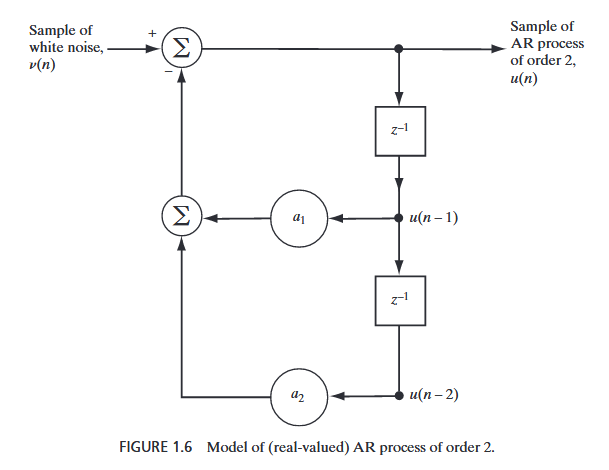

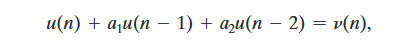

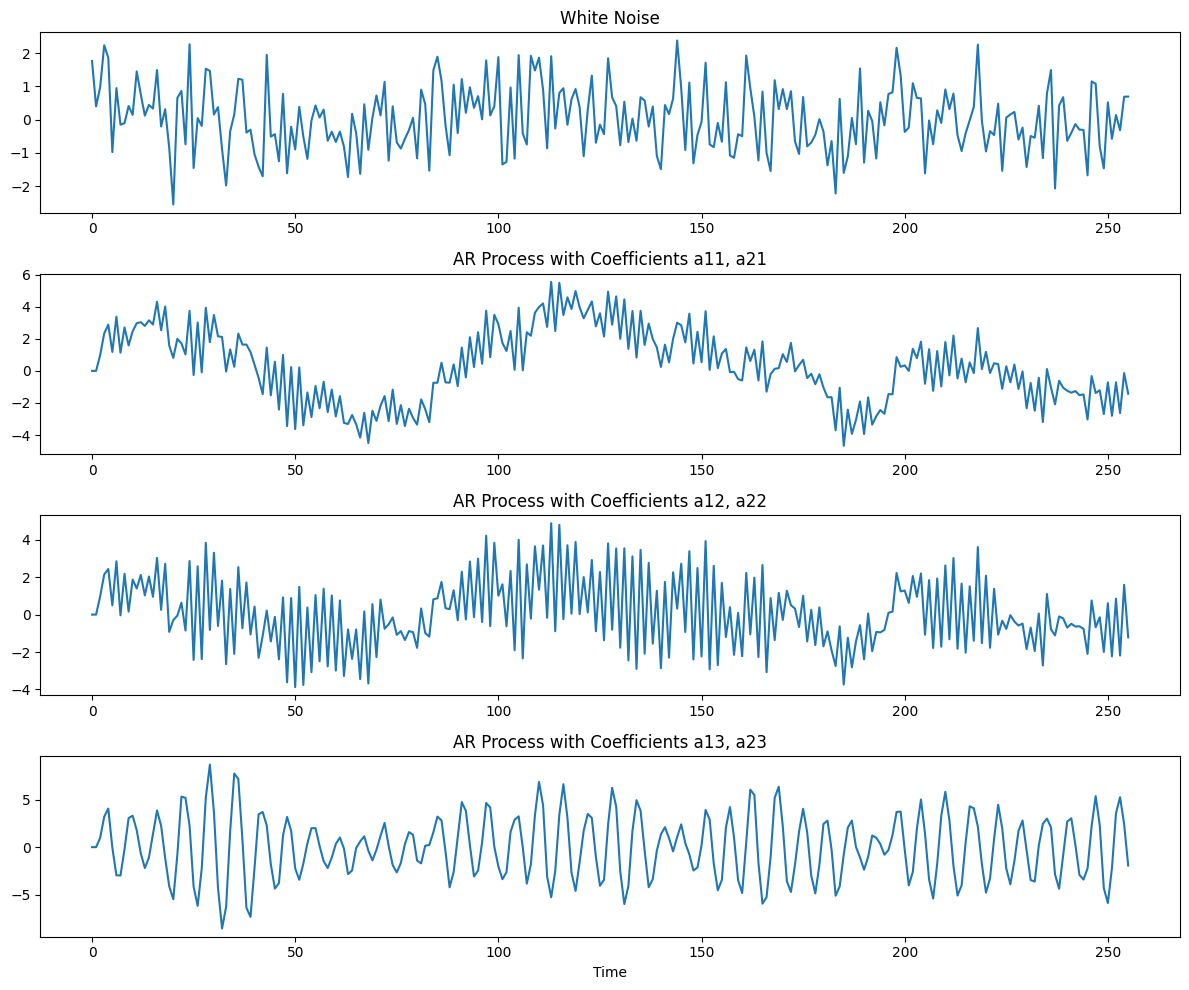

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 

# set the white noise
np.random.seed(0)
v = np.random.normal(0, 1, 256)  # set 1000 points for white noise with mean value 0 and var 1

# initialize the time series array
u1 = np.zeros_like(v)
u2 = np.zeros_like(v)
u3 = np.zeros_like(v)

# set the coefficients for AR
a11 = -0.1
a21 = -0.8
a12 = 0.1
a22 = -0.8
a13 = -0.975
a23 = 0.95

# Simulate the AR of order 2
for n in range(2, len(v)):
    u1[n] = - a11 * u1[n-1] - a21 * u1[n-2] + v[n]
    u2[n] = - a12 * u2[n-1] - a22 * u2[n-2] + v[n]
    u3[n] = - a13 * u3[n-1] - a23 * u3[n-2] + v[n]

# plot figures 
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(v)
plt.title("White Noise")

plt.subplot(412)
plt.plot(u1)
plt.title("AR Process with Coefficients a11, a21")

plt.subplot(413)
plt.plot(u2)
plt.title("AR Process with Coefficients a12, a22")

plt.subplot(414)
plt.plot(u3)
plt.title("AR Process with Coefficients a13, a23")

plt.xlabel("Time")
plt.tight_layout()
plt.show()


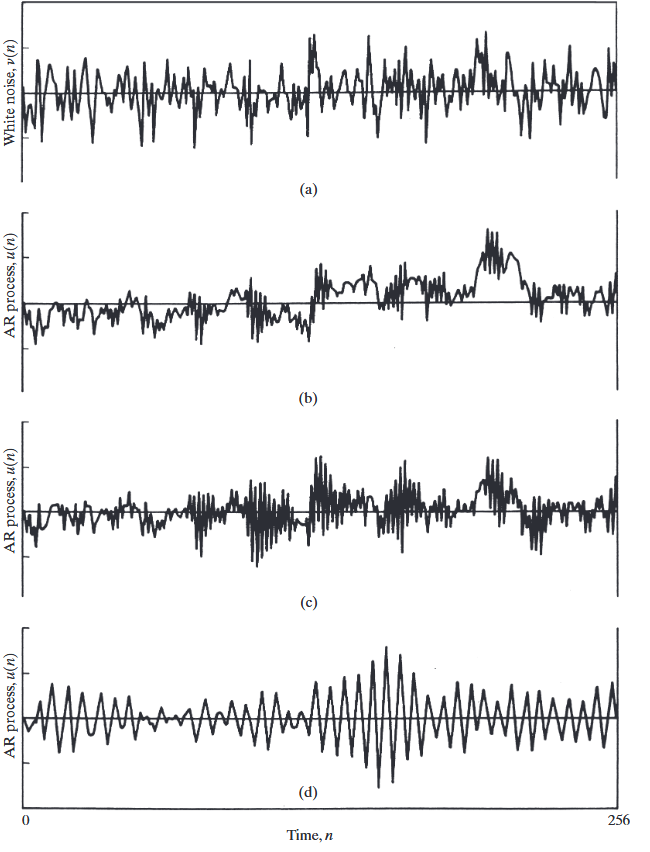

### Yule-Walker equations 

In [5]:
# According to the AR parameters to calculate the corresponding variance for white noise
def calculate_white_noise_variance_alternative(a1, a2):
    sigma_u_squared = 1  
    r1 = (-a1 / (1 + a2)) * sigma_u_squared
    r2 = (-a2 + (a1 ** 2) / (1 + a2)) * sigma_u_squared
    sigma_v_squared = sigma_u_squared + a1 * r1 + a2 * r2
    return sigma_v_squared


sigma_v_squared_alt_1 = calculate_white_noise_variance_alternative(a11, a21)
sigma_v_squared_alt_2 = calculate_white_noise_variance_alternative(a12, a22)
sigma_v_squared_alt_3 = calculate_white_noise_variance_alternative(a13, a23)

sigma_v_squared_alt_1, sigma_v_squared_alt_2, sigma_v_squared_alt_3



(0.2699999999999998, 0.2699999999999998, 0.073125)